In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat, loadmat
import scipy.sparse as sp

## Dataset Type I
The anchors choosen in this dataset is **uniformly ditributed** in the plane. The number of anchors is **25**, and the number of agents is **475**.

In [2]:
N = 500
N_anchors = 25
N_agents = 475
num_sample = 100

### Labels Generation

#### Initialization

In [3]:
Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels = np.zeros((num_sample, N, 2))

In [4]:
Uniform_100samples_25anchors_475agents_0Percent_004Variance_labels = np.zeros((num_sample, N, 2)) # 0.04 Variance
Uniform_100samples_25anchors_475agents_10Percent_004Variance_labels = np.zeros((num_sample, N, 2)) # 0.1 mean 0.04 Variance
Uniform_100samples_25anchors_475agents_10Percent_01Variance_labels = np.zeros((num_sample, N, 2)) # 0.1 mean 0.1 Variance
Uniform_100samples_25anchors_475agents_30Percent_01Variance_labels = np.zeros((num_sample, N, 2)) # 0.1 mean 0.1 Variance
Uniform_100samples_25anchors_475agents_30Percent_025Variance_labels = np.zeros((num_sample, N, 2)) # 0.1 mean 0.1 Variance
Uniform_100samples_25anchors_475agents_50Percent_025Variance_labels = np.zeros((num_sample, N, 2)) # 0.1 mean 0.1 Variance

#### Fix the anchors

In [5]:
idx_anchors = range(25)

In [6]:
cnt = 0
for i in range(5):
    for j in range(5):
        for k in range(num_sample):
            Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k][cnt][0] = 1.0 / 4.0 * i
            Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * j
        cnt = cnt + 1

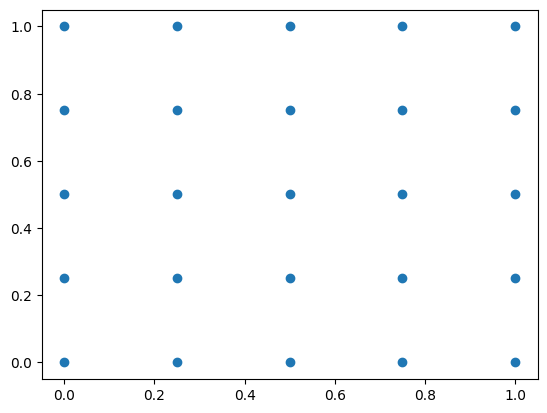

In [7]:
plt.scatter(Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[0].T[0][:25], Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[0].T[1][:25])

In [8]:
# Uniform_100samples_25anchors_475agents_0Percent_004Variance_labels[k].T[0][:N_anchors] = Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k].T[0][:N_anchors]
# Uniform_100samples_25anchors_475agents_10Percent_004Variance_labels[k].T[0][:N_anchors] = Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k].T[0][:N_anchors]
# Uniform_100samples_25anchors_475agents_10Percent_01Variance_labels[k].T[0][:N_anchors] = Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k].T[0][:N_anchors]
# Uniform_100samples_25anchors_475agents_30Percent_01Variance_labels[k].T[0][:N_anchors] = Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k].T[0][:N_anchors]
# Uniform_100samples_25anchors_475agents_30Percent_025Variance_labels[k].T[0][:N_anchors] = Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k].T[0][:N_anchors]
# Uniform_100samples_25anchors_475agents_50Percent_025Variance_labels[k].T[0][:N_anchors] = Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k].T[0][:N_anchors]

#### Generate the Agents

In [8]:
np.random.seed(42)

In [9]:
print(np.random.rand())

0.3745401188473625


In [10]:
for k in range(num_sample):
    #
    Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k].T[0][N_anchors:] = np.random.rand(N_agents)
    Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k].T[1][N_anchors:] = np.random.rand(N_agents)
    #
    # Uniform_100samples_25anchors_475agents_0Percent_004Variance_labels[k].T[0][N_anchors:] = Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k].T[0][N_anchors:] + np.random.normal(loc=0.0, scale=0.04, size=N_agents)
    # Uniform_100samples_25anchors_475agents_0Percent_004Variance_labels[k].T[1][N_anchors:] = Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k].T[0][N_anchors:] + np.random.normal(loc=0.0, scale=0.04, size=N_agents)
    # #
    # Uniform_100samples_25anchors_475agents_10Percent_004Variance_labels[k].T[0][N_anchors:] = Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k].T[0][N_anchors:] + np.random.normal(loc=0.1, scale=0.04, size=N_agents)
    # Uniform_100samples_25anchors_475agents_10Percent_004Variance_labels[k].T[1][N_anchors:] = Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k].T[0][N_anchors:] + np.random.normal(loc=0.1, scale=0.04, size=N_agents)
    # #
    # Uniform_100samples_25anchors_475agents_10Percent_01Variance_labels[k].T[0][N_anchors:] = Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k].T[0][N_anchors:] + np.random.normal(loc=0.1, scale=0.1, size=N_agents)
    # Uniform_100samples_25anchors_475agents_10Percent_01Variance_labels[k].T[1][N_anchors:] = Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k].T[0][N_anchors:] + np.random.normal(loc=0.1, scale=0.1, size=N_agents)
    # #
    # Uniform_100samples_25anchors_475agents_30Percent_01Variance_labels[k].T[0][N_anchors:] = Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k].T[0][N_anchors:] + np.random.normal(loc=0.3, scale=0.1, size=N_agents)
    # Uniform_100samples_25anchors_475agents_30Percent_01Variance_labels[k].T[1][N_anchors:] = Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k].T[0][N_anchors:] + np.random.normal(loc=0.3, scale=0.1, size=N_agents)
    # #
    # Uniform_100samples_25anchors_475agents_30Percent_025Variance_labels[k].T[0][N_anchors:] = Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k].T[0][N_anchors:] + np.random.normal(loc=0.3, scale=0.25, size=N_agents)
    # Uniform_100samples_25anchors_475agents_30Percent_025Variance_labels[k].T[1][N_anchors:] = Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k].T[0][N_anchors:] + np.random.normal(loc=0.3, scale=0.25, size=N_agents)
    # #
    # Uniform_100samples_25anchors_475agents_50Percent_025Variance_labels[k].T[0][N_anchors:] = Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k].T[0][N_anchors:] + np.random.normal(loc=0.5, scale=0.25, size=N_agents)
    # Uniform_100samples_25anchors_475agents_50Percent_025Variance_labels[k].T[1][N_anchors:] = Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k].T[0][N_anchors:] + np.random.normal(loc=0.5, scale=0.25, size=N_agents)

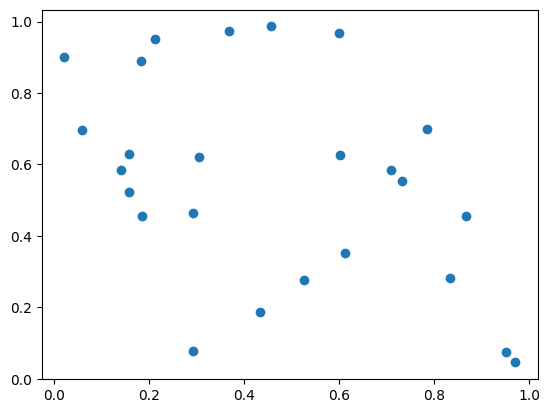

In [11]:
plt.scatter(Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[0].T[0][25:50], Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[0].T[1][25:50])

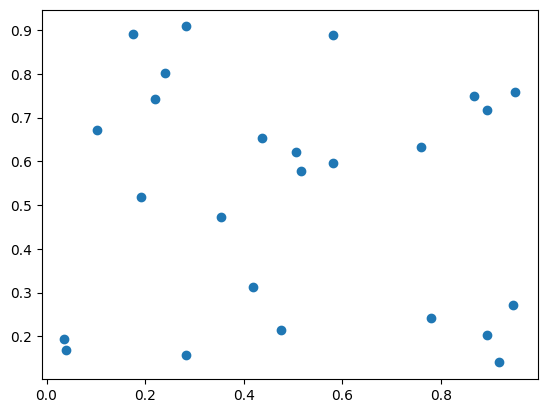

In [12]:
plt.scatter(Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[3].T[0][25:50], Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[3].T[1][25:50])

### Distance Generation

In [13]:
def compute_distance_matrix(points):
    diff = points[:, np.newaxis, :] - points[np.newaxis, :, :]
    dist_matrix = np.sqrt(np.sum(diff**2, axis=-1)) 
    return dist_matrix

In [20]:
def compute_distance_matrix_noise(points, mean, var):
    diff = points[:, np.newaxis, :] - points[np.newaxis, :, :]
    dist_matrix = np.sqrt(np.sum(diff**2, axis=-1)) 
    dist_matrix_noise = dist_matrix + np.random.normal(loc=mean, scale=np.sqrt(var), size=dist_matrix.shape) * dist_matrix
    return dist_matrix_noise

#### Initialization

In [15]:
Uniform_100samples_25anchors_475agents_0Percent_0Variance_dist = np.zeros((100, N, N))

In [16]:
Uniform_100samples_25anchors_475agents_0Percent_004Variance_dist = np.zeros((100, N, N)) # 0.04 Variance
Uniform_100samples_25anchors_475agents_10Percent_004Variance_dist = np.zeros((100, N, N)) # 0.1 mean 0.04 Variance
Uniform_100samples_25anchors_475agents_10Percent_01Variance_dist = np.zeros((100, N, N)) # 0.1 mean 0.1 Variance
Uniform_100samples_25anchors_475agents_30Percent_01Variance_dist = np.zeros((100, N, N)) # 0.1 mean 0.1 Variance
Uniform_100samples_25anchors_475agents_30Percent_025Variance_dist = np.zeros((100, N, N)) # 0.1 mean 0.1 Variance
Uniform_100samples_25anchors_475agents_50Percent_025Variance_dist = np.zeros((100, N, N)) # 0.1 mean 0.1 Variance

#### Compute the diatance matrices

In [17]:
print(Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels.shape)

(100, 500, 2)


In [18]:
range_anchors = compute_distance_matrix(Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[0][idx_anchors, :])

In [21]:
for k in range(num_sample):
    Uniform_100samples_25anchors_475agents_0Percent_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k])
    Uniform_100samples_25anchors_475agents_0Percent_004Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k], 0.0, 0.04)
    Uniform_100samples_25anchors_475agents_10Percent_004Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k], 0.1, 0.04)
    Uniform_100samples_25anchors_475agents_10Percent_01Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k], 0.1, 0.1)
    Uniform_100samples_25anchors_475agents_30Percent_01Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k], 0.3, 0.1)
    Uniform_100samples_25anchors_475agents_30Percent_025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k], 0.3, 0.25)
    Uniform_100samples_25anchors_475agents_50Percent_025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels[k], 0.5, 0.25)

### Save the matrices

In [22]:
savemat('Uniform_100samples_25anchors_475agents_0Percent_0Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Percent_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_0Percent_0Variance_dist})
savemat('Uniform_100samples_25anchors_475agents_0Percent_004Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Percent_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_0Percent_004Variance_dist})
savemat('Uniform_100samples_25anchors_475agents_10Percent_004Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Percent_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_10Percent_004Variance_dist})
savemat('Uniform_100samples_25anchors_475agents_10Percent_01Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Percent_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_10Percent_01Variance_dist})
savemat('Uniform_100samples_25anchors_475agents_30Percent_01Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Percent_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_30Percent_01Variance_dist})
savemat('Uniform_100samples_25anchors_475agents_30Percent_025Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Percent_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_30Percent_025Variance_dist})
savemat('Uniform_100samples_25anchors_475agents_50Percent_025Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Percent_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Percent_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_50Percent_025Variance_dist})

### Data processing

In [6]:
import torch

#### Relavent Functions

In [14]:
def adjacent_normalize(mx):
    """"D^(-0.5)*A*D^(-0.5)"""
    rowsum = np.array(mx.sum(1))
    rowsum[rowsum == 0] = 1e-10
    r_inv_half = np.power(rowsum, -0.5).flatten()
    r_inv_half[np.isinf(r_inv_half)] = 0.
    r_mat_inv = sp.diags(r_inv_half)
    mx = mx.dot(r_mat_inv).transpose().dot(r_mat_inv)
    return mx


def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape)

def normalize(mx):
    """Row-normalize sparse matrix"""
    rowsum = np.array(mx.sum(1))
    rowsum[rowsum == 0] = 1e-10
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    mx = r_mat_inv.dot(mx)
    return mx

def sample(adj_matrix, adj_ture_matrix, max_neighbors=10):
    """
    对每个节点进行邻居采样，确保每个节点的邻居最多为 max_neighbors 条。
    并且优先选择权重最小的边。

    参数:
    adj_matrix (numpy.ndarray): 大小为 (N, N) 的邻接矩阵，其中每个元素是边的权重。
    max_neighbors (int): 每个节点最多保留的邻居数。
    
    返回:
    numpy.ndarray: 更新后的邻接矩阵。
    """
    N = adj_matrix.shape[0]  # 节点数目
    
    # 新的邻接矩阵
    sampled_adj_matrix = np.zeros_like(adj_matrix)
    sampled_true_adj_matrix = np.zeros_like(adj_ture_matrix)
    
    # 对每个节点进行处理
    for i in range(N):
        # 获取节点 i 与其他节点的所有边的权重及其索引
        row = adj_matrix[i]
        row_true = adj_ture_matrix[i]
        
        # 获取非零的边权重和对应的邻居节点
        neighbors = np.where(row > 0)[0]  # 找到与节点 i 相连的所有节点
        weights = row[neighbors]  # 这些节点的边权重
        weights_true = row_true[neighbors]
        
        # 如果当前节点的邻居不超过 max_neighbors，直接复制原来的邻接矩阵
        if len(neighbors) <= max_neighbors:
            sampled_adj_matrix[i, neighbors] = weights
            sampled_true_adj_matrix[i, neighbors] = weights_true
        else:
            # 按照边权重升序排序，选择权重最小的 max_neighbors 条边
            sorted_indices = np.argsort(weights)[:max_neighbors]  # 找到权重最小的 max_neighbors 个边
            selected_neighbors = neighbors[sorted_indices]  # 选中的邻居节点
            selected_weights = weights[sorted_indices]  # 选中的边权重
            selected_weights_true = weights_true[sorted_indices]
            
            # 更新邻接矩阵，只保留选择的邻居和边权重
            sampled_adj_matrix[i, selected_neighbors] = selected_weights
            sampled_true_adj_matrix[i, selected_neighbors] = selected_weights_true
    
    return sampled_adj_matrix, sampled_true_adj_matrix

In [2]:
def load_data(threshold, num_edge = None):
    # Load the dataset
    m = loadmat("./Networks_new/Uniform_100samples_25anchors_475agents_50Percent_025Variance.mat")

    Range_Mat = m["range"]  # Range = Distance + noise
    Dist_Mat = m["dist"]
    labels = m["labels"]

    # Size information
    num_sample = Range_Mat.shape[0]
    N = 500
    N_anchors = 25
    N_agents = 475
    mode_adj = 1
    mode_fea = 1
    
    idx_train = range(0, 70)
    idx_val = range(70, 80)
    idx_test = range(80, 100)
    idx_train = torch.LongTensor(idx_train)
    idx_val = torch.LongTensor(idx_val)
    idx_test = torch.LongTensor(idx_test)
    
    features_all = []
    # labels_all = []
    adj_all = []
    S_all = []
    # delta_all = []
    # degree_all = []
    # fea_original_all = []
    fea_true_all = []
    truncated_noise_all = []
    # Range_Mat_all = []
    # Dist_Mat_all = []
    # Dist_all = []
    # Range_all = []
    
    for k in range(num_sample):
        Range = Range_Mat[k].copy()
        Dist = Dist_Mat[k].copy()
        
        # Truncated range
        Range[Range > threshold] = 0
        Dist[Range > threshold] = 0
        
        # Graphsage sample
        if num_edge:
            Range, Dist = sample(Range, Dist, num_edge)

        # Get the feature matrix
        features = Range.copy()
        
        # get the truncated true feature
        dist = Dist.copy()
        
        # Get the adjacent matrix
        Range_tem = Range.copy()
        Range_tem[Range_tem > 0] = 1
        Adj = Range_tem

        # truncated noise is the unnormalized truncated noize, which is used to compare with the full matrix noise
        truncated_noise = features - dist

        # Sparse matrix form
        features = sp.csr_matrix(features, dtype=np.float64)
        dist = sp.csr_matrix(dist, dtype=np.float64)
        Adj = sp.csr_matrix(Adj, dtype=np.float64)

        # Normalize
        # features_original = normalize(Dist_Mat[k])
        features_true = normalize(dist)
        features = normalize(features)
        adj = normalize(Adj + sp.eye(Adj.shape[0]))
        S = adjacent_normalize(Adj)

        # features = torch.FloatTensor(features.todense())
        features_all.append(sparse_mx_to_torch_sparse_tensor(features))
        adj_all.append(sparse_mx_to_torch_sparse_tensor(adj))
        S_all.append(sparse_mx_to_torch_sparse_tensor(S))
        # delta_all.append(torch.FloatTensor(Delta))
        # degree_all.append(torch.FloatTensor(np.diag(Degree)))
        # fea_original_all.append(torch.FloatTensor(features_original))
        fea_true_all.append(sparse_mx_to_torch_sparse_tensor(features_true))
        truncated_noise_all.append(torch.FloatTensor(truncated_noise))
        # Range_Mat_all.append(torch.FloatTensor(Range_Mat))
        # Dist_Mat_all.append(torch.FloatTensor(Dist_Mat))
        # Dist_all.append(torch.FloatTensor(Dist))
        # Range_all.append(torch.FloatTensor(Range))
    
    labels_all = torch.FloatTensor(labels)
    
    return mode_fea, mode_adj, idx_train, idx_val, idx_test, features_all, labels_all, adj_all, S_all, fea_true_all, truncated_noise_all

In [15]:
mode_fea, mode_adj, idx_train, idx_val, idx_test, features_all, labels_all, adj_all, S_all, fea_true_all, truncated_noise_all = load_data(0.2, 10)

In [25]:
print(labels_all[0].shape)

torch.Size([500, 2])


## Test the new model

In [1]:
from models import GCN, C_GCN

In [3]:
model = C_GCN(nfeat=500,
                nhid1=200,
                nout=2,
                dropout=0.5)

In [6]:
for name, param in model.named_parameters():
    print(f'{name}: {param.requires_grad}')

coeff: False
gc1.weight: True
gc1.bias: True
gc2.weight: True
gc2.bias: True


In [5]:
model.coeff.requires_grad = False